# Titanic Project

# Problem Statement:

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
import warnings
warnings.filterwarnings('ignore')
#As the metrics is common for all classification problems so imported common metrics all at once.

# Loading dataset and creating a Dataframe 

In [2]:
# Loading Dataset
data = pd.read_csv('titanic_train.csv')
df=pd.DataFrame(data)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Initial data processing

In [4]:
df.shape

(891, 12)

Dataset has  891 Rows & 12 Column observation, out of which 1 is target columns and rest 11 are featured columns

In [7]:
#data statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Getting more information on the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

From the above it is clear that some missing datas are present, that is 

1 - maximum missing data is 687 in Cabin column.

2 - in the second place is 177 in Age column.

3 - minimum missing data is 2 in Embarked column.

# Handling the missing data

# 1. Maximum missing data

Since Cabin Column has maximum missing data and it is not having any significance in the survival or not (influencing target variable), lets drop the Cabin column.

And similarly PassengerId, Name and Ticket details have no significance in the survival or not (influencing target variable), so lets drop the PassengerId, Name and Ticket columns as well.

In [8]:
#Dropping the columns that is not influencing the targer variable.
df.drop(['PassengerId','Name','Cabin','Ticket'],axis=1,inplace=True)

# 2. Less missing data

Since Age Column 177 missing datas out of 891 datas, it cannot be dropped.
So the next best approch is replacing the missing datas with the mean value.

In [9]:
#Replacing missing data with mean value
df['Age'].fillna(df['Age'].mean(), inplace = True)

# 3. Minimum missing data

Since Embarked Column has only 2 missing datas out of 891 datas, it also cannot be dropped or replaced with mean value.
So the next best approch is replacing the missing datas with the most occuring data that is mode value.

In [11]:
#checking the mode value
print (df['Embarked'].mode()[0])

S


So, most of the people have Embarked from S - Southampton, we will consider that the 2 missing people have Embarked from S - Southampton.

In [13]:
# Replacing the missing value with mode value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Checking the data of the updated Dataframe

In [14]:
df.shape

(891, 8)

In [15]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

So there is no missing data now.

In [16]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


The dataframe shows only influencing variables after unrelevant variable got dropped.

Now, From the above data lets convert the Sex column and Embarked column to computer laguage that is numerical values.

# Encoding the catergorical columns

In [17]:
# Before Encoding data details
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [18]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
df.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)

In [20]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [22]:
# After Encoding data details
df['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [23]:
df['Embarked'].value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

# Data Visualisation

In [24]:
#Count plot for Categorical Variables
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

Correct Column name Displayed without any spaces present in col name.

# For Survived

In [27]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

0 - Not Survived

1- Survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

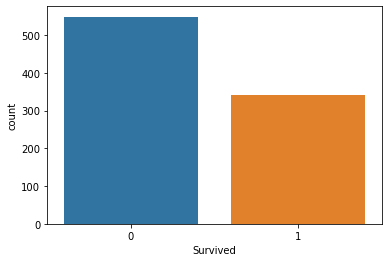

In [28]:
sns.countplot(df['Survived'])

# For Sex

In [29]:
df['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

0 - Male and 1 - Female

<AxesSubplot:xlabel='Sex', ylabel='count'>

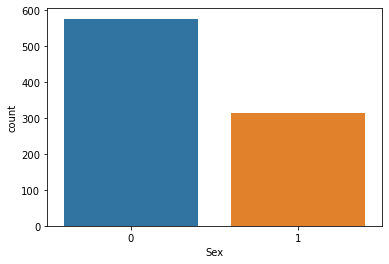

In [31]:
sns.countplot(df['Sex'])

# For SibSp

In [34]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='count'>

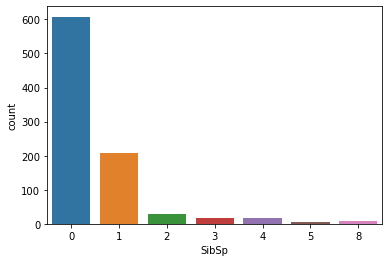

In [35]:
sns.countplot(df['SibSp'])

SibSp has 5 unique values which represent No siblings & Spouses of the passenger aboard..

0 count is the highest

5 count is the least

# For Parch

In [36]:
df['Parch'].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

<AxesSubplot:xlabel='Parch', ylabel='count'>

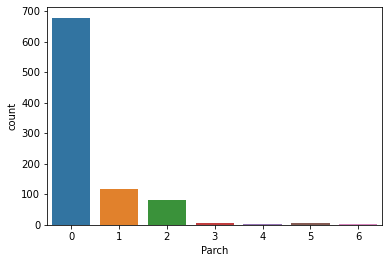

In [37]:
sns.countplot(df['Parch'])

Parch Col represents No of Parents & Childrens of the passenger aboard.

Where the count of 6 has only 1 which is the least.

Count of 0 is the highest which is 678 means no parents & childrens of the passenger aboard present.

There are 118 Obs which has 1 parents or children of the passenger aboard.

There is 1 Obs which shows 6 no parents or childrens of passenger aboard.

# Histogram plot

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>,
        <AxesSubplot:title={'center':'Sex'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>,
        <AxesSubplot:title={'center':'Embarked'}>, <AxesSubplot:>]],
      dtype=object)

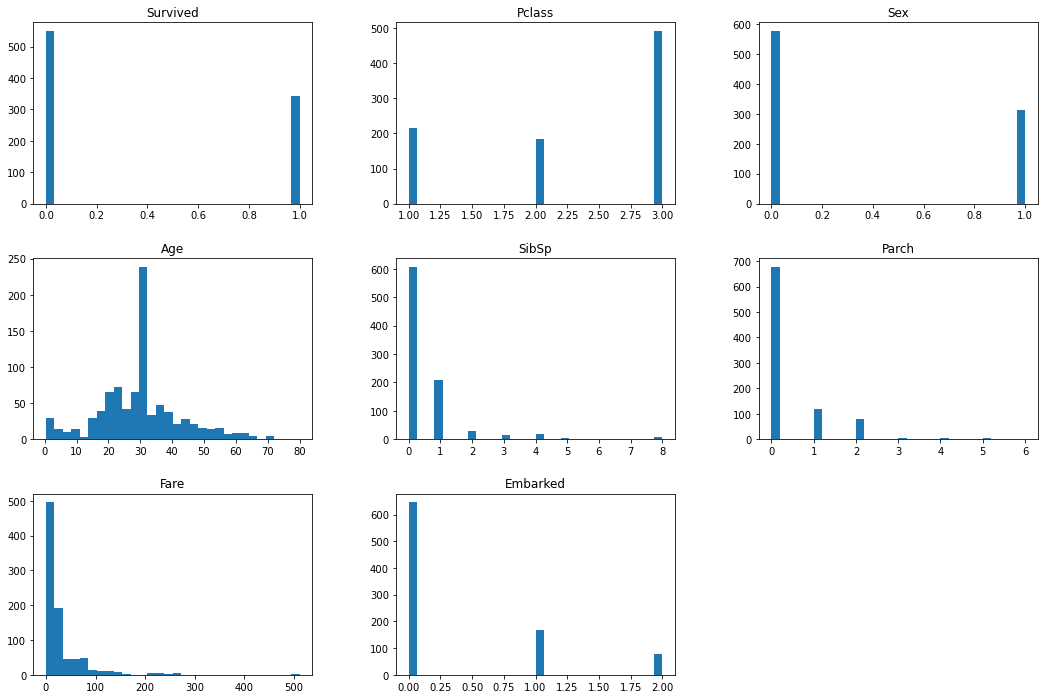

In [38]:
df.hist(grid=False, figsize=(18,12), bins=30)

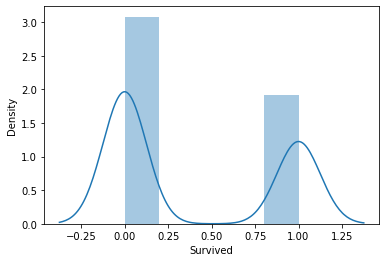

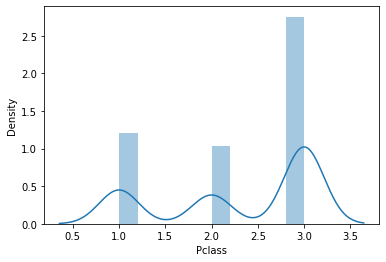

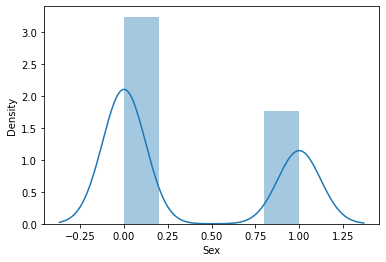

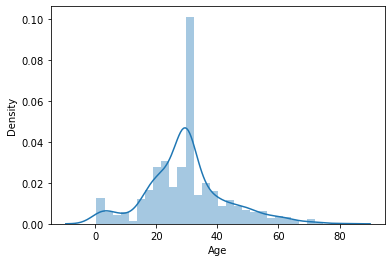

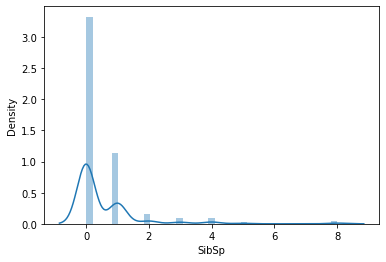

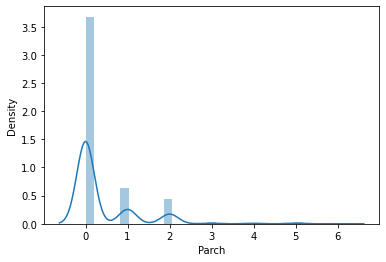

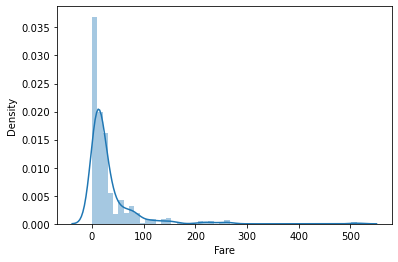

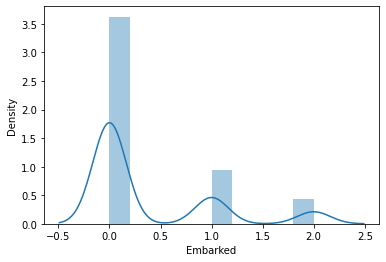

In [39]:
for i in df:
    plt.figure()
    sns.distplot(df[i])

Fare has right skewed data.

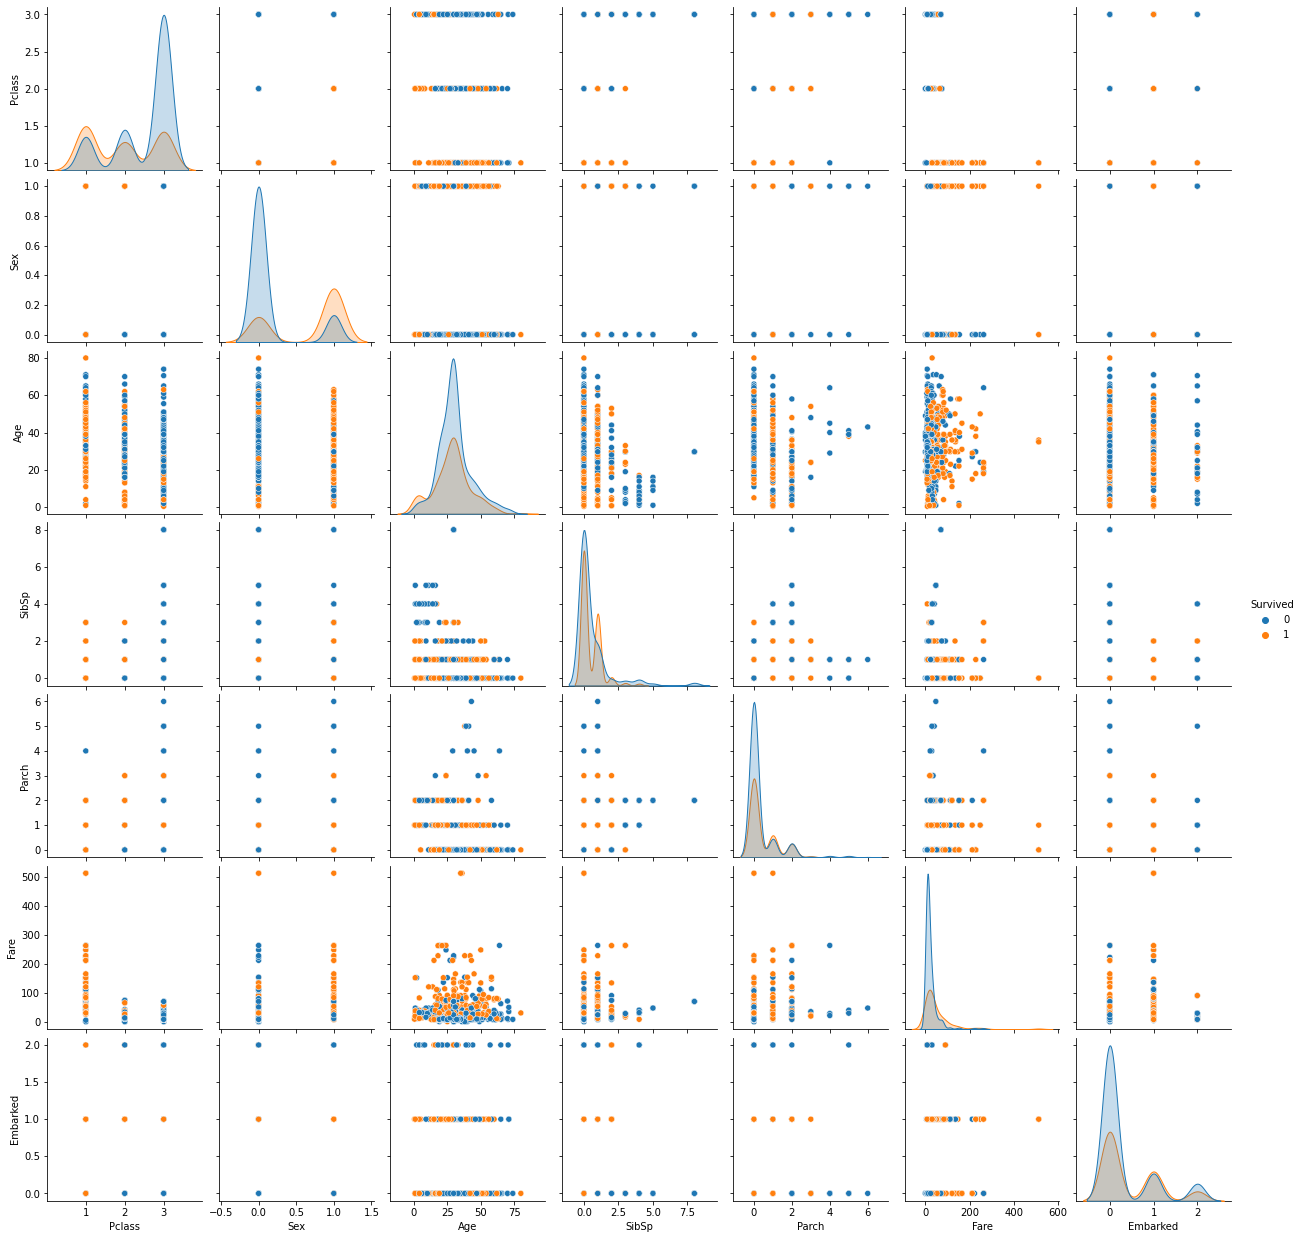

In [40]:
sns.pairplot(df,hue="Survived")

As most of the variables is categorical will show the value in Numbers.

Pclass shows that passenger having high fare value are survived more then those having low fare value.

Pclass with unique value 3 has high Sibling & Spouse values who are not surivived.

Fare & Age shows non linear relationship.

# Correlation & HeatMap

In [45]:
corr=df.corr()
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,0.045702
Sex,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.116569
Age,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,0.007461
SibSp,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059961
Parch,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.078665
Fare,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.062142
Embarked,0.106811,0.045702,0.116569,0.007461,-0.059961,-0.078665,0.062142,1.000000


<AxesSubplot:>

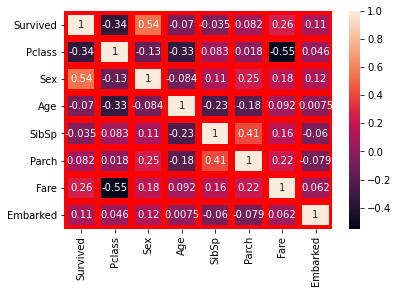

In [46]:
sns.heatmap(corr,annot=True,linewidths=6,linecolor='r')

# MultiCollinearity Test : Variation Infaltion Factor

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif["features"]=df.columns
    print(vif)

In [52]:
vif_calc()

   VIF Factor  features
0    2.359230  Survived
1    4.030973    Pclass
2    2.363313       Sex
3    4.008263       Age
4    1.574811     SibSp
5    1.632035     Parch
6    1.862655      Fare
7    1.395776  Embarked


# Outliers Removal & Percentage of Outliers present.

<AxesSubplot:>

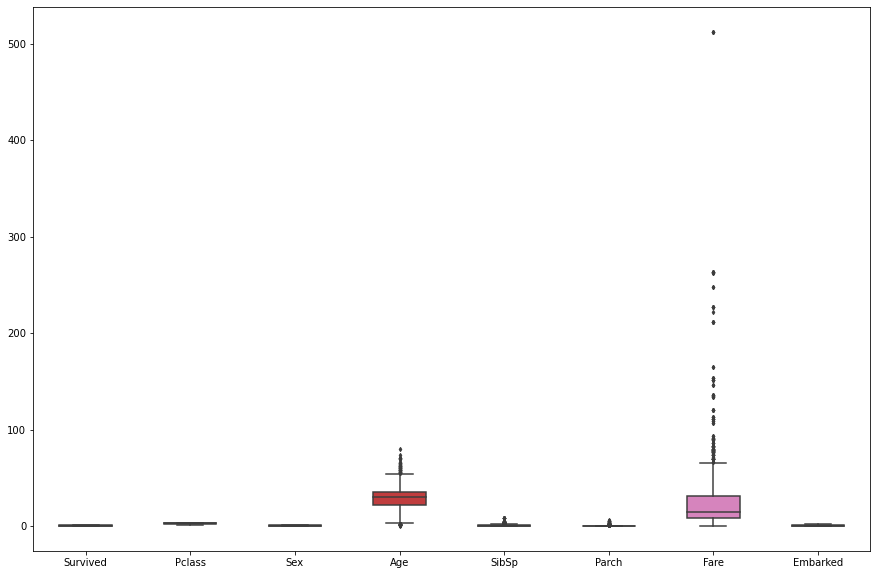

In [54]:
fig, ax =plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width = 0.5,ax=ax, fliersize=3)

# Z-Score for removing Outliers

In [55]:
#detecting outliers
from scipy.stats import zscore
dfzscore=np.abs(zscore(df))
print(np.where(dfzscore>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
       6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5,
       5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 4,
       4, 4, 3, 5, 4, 5], dtype=int64))


In [57]:
dfnew=df[(dfzscore<3).all(axis=1)]
print('dfnew.shape=',dfnew.shape)

df=dfnew

dfnew.shape= (820, 8)


Outliers removed as we can see with no of rows reduced to 820

In [58]:
Data_loss=((891-820)/891)*100 # Computing outlier percentage
Data_loss

7.968574635241302

The total Outliers removed is less then 8% hence the same is removed from the dataset for preparing model.

In [59]:
df.skew()

Survived    0.450825
Pclass     -0.632242
Sex         0.664152
Age         0.318314
SibSp       1.979577
Parch       2.122629
Fare        2.318761
Embarked    1.552592
dtype: float64

Fare Col is Coninous shows high positive skewness and not fall in normal range of 0.5 & -0.5

<AxesSubplot:xlabel='Fare', ylabel='Density'>

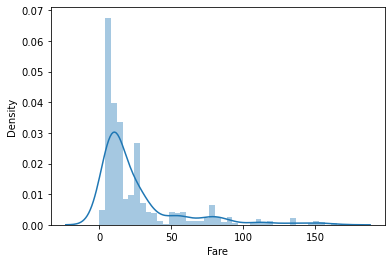

In [61]:
sns.distplot(df['Fare'])

Sqrt Method is applied to reduce skeness in fare data.

In [62]:
import numpy as np
df['Fare']=np.sqrt(df['Fare'])
df.skew()

Survived    0.450825
Pclass     -0.632242
Sex         0.664152
Age         0.318314
SibSp       1.979577
Parch       2.122629
Fare        1.350428
Embarked    1.552592
dtype: float64

skeness reduced to 1.35 still not in normal range hence applied sqrt method one more time.

<AxesSubplot:>

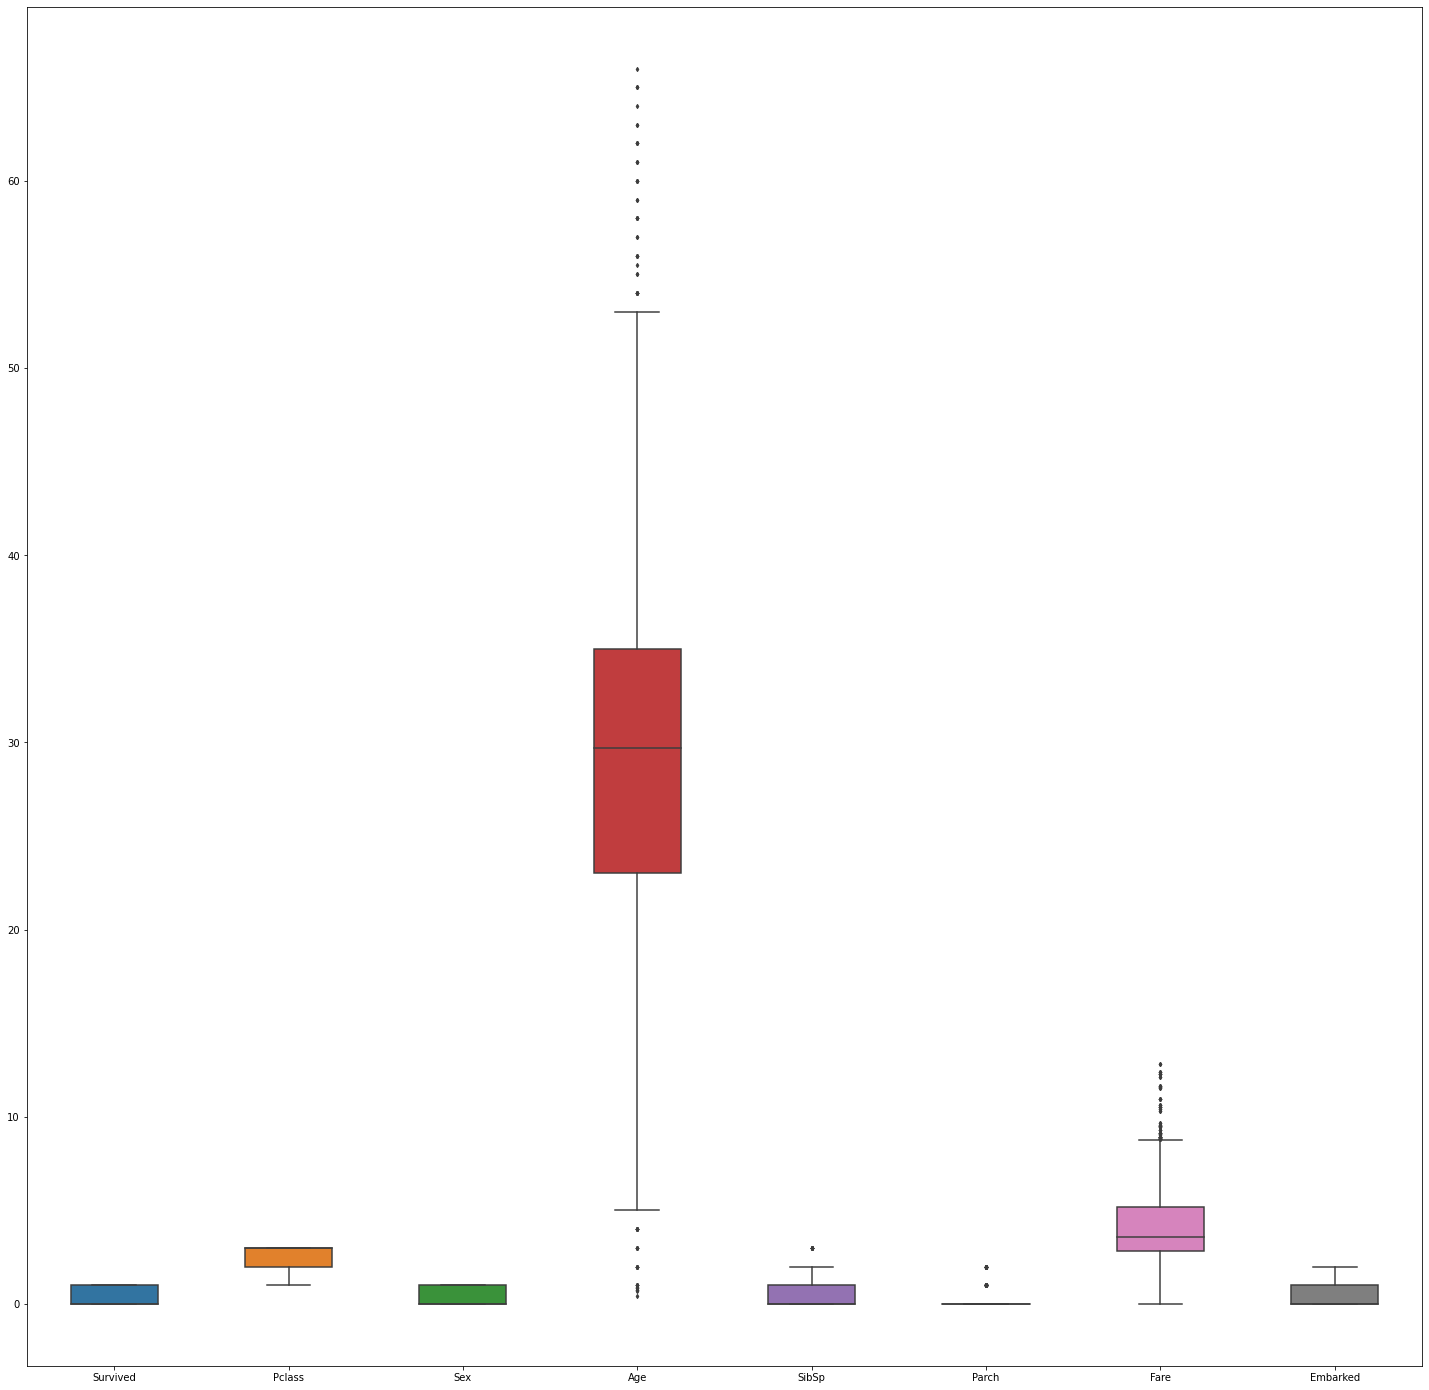

In [63]:
fig, ax =plt.subplots(figsize=(25,25))
sns.boxplot(data=df, width = 0.5,ax=ax, fliersize=3)

# Separating dependent and independent variable

In [64]:
x = dfnew.drop("Survived", axis=1)
y = dfnew["Survived"]

In [65]:
x.shape

(820, 7)

In [66]:
y.shape

(820,)

In [69]:
y.value_counts()

0    500
1    320
Name: Survived, dtype: int64

In [67]:
# x varibles without target variable
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,2.692582,0
1,1,1,38.0,1,0,8.442944,1
2,3,1,26.0,0,0,2.815138,0
3,1,1,35.0,1,0,7.286975,0
4,3,0,35.0,0,0,2.837252,0


# Class Imbalance

In [70]:
df['Survived'].value_counts()

0    500
1    320
Name: Survived, dtype: int64

In [71]:
#importing resample libraries which is used for class balance.
from sklearn.utils import resample
# Concatenate our training data back together
x = pd.concat([x, y], axis=1)

In [72]:
nsvd= x[x.Survived==0]
svd = x[x.Survived==1]

nsvd instance respresents not survived whose value is set to 0.

svd instance respresents survived whose value is set to 1

we are balancing 1-Survied Value with 0-Not survived value.

Hence Upsampling is used for the same.

In [73]:
# upsample minority
dia_upsampled = resample(svd,
                          replace=True, # sample with replacement
                          n_samples=len(nsvd),   # match number in majority
                          random_state=27)  # reproducible results

In [74]:
upsampled = pd.concat([nsvd, dia_upsampled])

In [75]:
upsampled.Survived.value_counts()

0    500
1    500
Name: Survived, dtype: int64

In [76]:
upsampled

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,0,22.000000,1,0,2.692582,0,0
4,3,0,35.000000,0,0,2.837252,0,0
5,3,0,29.699118,0,0,2.908316,2,0
6,1,0,54.000000,0,0,7.201562,0,0
7,3,0,2.000000,3,1,4.590752,0,0
...,...,...,...,...,...,...,...,...
550,1,0,17.000000,0,2,10.530114,1,1
8,3,1,27.000000,0,2,3.336660,0,1
381,3,1,1.000000,0,2,3.967581,1,1
607,1,0,27.000000,0,0,5.522681,0,1


upsampled is the new dataframe where target col is balanced with equal value = 500

In [77]:
x = upsampled[['Pclass','Sex','Age','SibSp','Parch','Fare']]
y = upsampled['Survived']

In [78]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.000000,1,0,2.692582
4,3,0,35.000000,0,0,2.837252
5,3,0,29.699118,0,0,2.908316
6,1,0,54.000000,0,0,7.201562
7,3,0,2.000000,3,1,4.590752
...,...,...,...,...,...,...
550,1,0,17.000000,0,2,10.530114
8,3,1,27.000000,0,2,3.336660
381,3,1,1.000000,0,2,3.967581
607,1,0,27.000000,0,0,5.522681


In [79]:
x.shape

(1000, 6)

In [80]:
y.shape

(1000,)

# Scaling the independent variables

In [81]:
scaling = StandardScaler()
x=scaling.fit_transform(x)
x

array([[ 0.90043348, -0.83706647, -0.56290001,  1.06434444, -0.51006137,
        -0.82554961],
       [ 0.90043348, -0.83706647,  0.46871852, -0.59351294, -0.51006137,
        -0.76612926],
       [ 0.90043348, -0.83706647,  0.04806556, -0.59351294, -0.51006137,
        -0.73694129],
       ...,
       [ 0.90043348,  1.19464826, -2.22936071, -0.59351294,  2.67782219,
        -0.30186822],
       [-1.46912832, -0.83706647, -0.16612366, -0.59351294, -0.51006137,
         0.33685918],
       [ 0.90043348,  1.19464826,  0.04806556, -0.59351294,  2.67782219,
         0.01064679]])

In [82]:
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=i)
    from sklearn.tree import DecisionTreeClassifier
    lm = DecisionTreeClassifier()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    print(accu*100, "at random_state", i)  

85.15151515151516 at random_state 0
85.75757575757575 at random_state 1
84.24242424242424 at random_state 2
85.75757575757575 at random_state 3
86.06060606060606 at random_state 4
83.93939393939394 at random_state 5
85.15151515151516 at random_state 6
85.15151515151516 at random_state 7
89.39393939393939 at random_state 8
85.45454545454545 at random_state 9
87.87878787878788 at random_state 10
90.6060606060606 at random_state 11
85.15151515151516 at random_state 12
81.81818181818183 at random_state 13
86.66666666666667 at random_state 14
86.36363636363636 at random_state 15
87.57575757575758 at random_state 16
88.18181818181819 at random_state 17
83.93939393939394 at random_state 18
84.54545454545455 at random_state 19
85.75757575757575 at random_state 20
85.75757575757575 at random_state 21
84.24242424242424 at random_state 22
84.84848484848484 at random_state 23
86.66666666666667 at random_state 24
87.57575757575758 at random_state 25
87.87878787878788 at random_state 26
84.242424242

In [83]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ", maxAccu," on Random_state ",maxRS)

Best accuracy is  0.91  on Random_state  68


# Splitting dataset x train, x test, y train y test

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=68)

Best random state used is 68

In [85]:
print("x-train shape: ", x_train.shape)
print("x-test shape: ", x_test.shape)
print("y-train shape: ", y_train.shape)
print("y-test shape: ", y_test.shape)

x-train shape:  (800, 6)
x-test shape:  (200, 6)
y-train shape:  (800,)
y-test shape:  (200,)


# Creating ML Algorithm

# 1. Logistic Regression

In [91]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
acc = classification_report(y_test, pred)
print(acc)

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       113
           1       0.76      0.82      0.79        87

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200



Log Regression Acc = 81%

# 2. Random Forest Classifier

In [88]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
acc = classification_report(y_test, pred)
print(acc)

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       113
           1       0.88      0.94      0.91        87

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



RFR Acc = 92%

# 3. Support Vector Regressor

In [89]:
svc=SVC()
svc.fit(x_train, y_train)
pred = svc.predict(x_test)
acc = classification_report(y_test, pred)
print(acc)

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       113
           1       0.80      0.86      0.83        87

    accuracy                           0.84       200
   macro avg       0.84      0.85      0.84       200
weighted avg       0.85      0.84      0.85       200



SVC Acc = 84%

# 4. Knn Classifier

In [90]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
acc = classification_report(y_test, pred)
print(acc)

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       113
           1       0.80      0.86      0.83        87

    accuracy                           0.84       200
   macro avg       0.84      0.85      0.84       200
weighted avg       0.85      0.84      0.85       200



Knn Acc = 84%

# 5. Decison tree Classifier

In [93]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)
pred = DTC.predict(x_test)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)

0.885
              precision    recall  f1-score   support

           0       0.94      0.85      0.89       113
           1       0.83      0.93      0.88        87

    accuracy                           0.89       200
   macro avg       0.88      0.89      0.88       200
weighted avg       0.89      0.89      0.89       200



DTC Acc = 89%

# Kfold Cross Validation

In [94]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# Creating CV Object with shuffle = true to avoid -ve CV Values as o/p
cross_validation=KFold(5, shuffle =True) 

In [95]:
 # Logistic regression
print(cross_val_score(lg,x,y,cv=cross_validation).mean())

0.798


In [96]:
 # RandomForestClassifier
print(cross_val_score(rf,x,y,cv=cross_validation).mean())

0.891


In [97]:
 # Support Vector Regressor
print(cross_val_score(svc,x,y,cv=cross_validation).mean())

0.827


In [98]:
 # KNeighborsClassifier
print(cross_val_score(knn,x,y,cv=cross_validation).mean())

0.8280000000000001


In [99]:
# Decision Tree Classifier 
print(cross_val_score(DTC,x,y,cv=cross_validation).mean())

0.8640000000000001


Logistic regression  - Acc - CV value = 81-79.8 = 1.2

RandomForestClassifier  - Acc - CV value = 92-89.1 = 2.9

Support Vector Regressor  - Acc - CV value = 84-82.7 = 1.3

KNeighborsClassifier  - Acc - CV value = 84-82.8 = 1.2

Decision Tree Classifier - Acc - CV value = 89-86.4 = 2.6

Logistic regression is the best model as it has least diff = 1.2

# GridSearch CV & Hyperparameter Tuning.

In [101]:
from sklearn.model_selection import GridSearchCV
import numpy as np
parameter = {'max_depth' : np.arange(2,10),
            'criterion':['gini','entropy'],
            'n_estimators' : [100],
            'max_features' : ['auto','sqrt','log2']}

In [102]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=cross_validation)
GCV.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100]})

In [103]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'log2',
 'n_estimators': 100}

# Best Model Selected is Random Forest Classifier

In [105]:
Final_mod = RandomForestClassifier(criterion = 'gini', max_depth = 9,max_features='sqrt',n_estimators= 100)
Final_mod.fit(x_train, y_train)
pred = Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

91.0


Final Accuracy of the best model = 91 %

# Exporting Model with joblib libraries

In [106]:
import joblib
joblib.dump(Final_mod,"FinalModel.pkl")

['FinalModel.pkl']